# Esma 3016, lab3
## Edgar Acuna
### Febrero 2018

Organizacion y presentacion de datos cuantitativos continuos.
Usaremos el modulo numpy, el modulo pandas, que se usa para hacer analisis estadistico basico y el modulo matplotlib que se usa para hacer la tabla de frecuencias y las graficas.

In [16]:
import numpy as np
import pandas as pd

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
#Leyendo datos de la internet, las columnas tienen nombres
datos=pd.read_csv("http://academic.uprm.edu/eacuna/clase97.txt",sep=" ")
#Viendo las seis primera fila de la tabla de datos
datos.head()

,edad,sexo,escuela,programa,creditos,gpa,familia,hestud,htv
0,21,f,publ,biol,119,3.60,3,35,10
1,18,f,priv,mbio,15,3.60,3,30,10
2,19,f,priv,biot,73,3.61,5,5,7
3,20,f,priv,mbio,*,2.38,3,14,3
4,21,m,publ,pmed,114,3.15,2,25,25


In [19]:
#Este en un primer intento de hacer la tabla de frecuencias
#para datos agrupados usando numpy solamente
#Este comando encuentra las frecuencias absolutas
#y los puntos del corte en forma automatica usando numpy
conteo, cortes=np.histogram(datos['gpa'])
#Aqui se muestran las frecuencias absolutas de los intervalos y los puntos de cortes respectivos
conteo, cortes

(array([2, 2, 1, 3, 1, 6, 2, 3, 7, 1], dtype=int64),
 array([ 2.15 ,  2.321,  2.492,  2.663,  2.834,  3.005,  3.176,  3.347,
         3.518,  3.689,  3.86 ]))

#### Comentario: Demasiados intervalos,10, para tan solo 28 datos en lo que sigue vamos a construir una tabla de frecuencias con 5 intervalos

In [20]:
#Los puntos de cortes de los 5 intervalos son entrados manualmente
#la amplitud que se ha usado es (Mayor-menor)/5=.34  redondeado a .35
cortesf=[2.15,2.5,2.85,3.2,3.55,3.9]
conteof, cortesf=np.histogram(datos['gpa'],bins=cortesf)
#estas son las frecuencias absolutas
conteof

array([4, 4, 8, 5, 7], dtype=int64)

In [21]:
#estos son los puntos de cortes
cortesf

array([ 2.15,  2.5 ,  2.85,  3.2 ,  3.55,  3.9 ])

In [22]:
#Calculo de las frecuencias absolutas usando pandas
a1=pd.cut(datos['gpa'],cortesf,right=False)
t1=pd.value_counts(a1,sort=False)
t1=pd.DataFrame(t1)
t1

,gpa
"[2.15, 2.5)",4
"[2.5, 2.85)",4
"[2.85, 3.2)",8
"[3.2, 3.55)",5
"[3.55, 3.9)",7


In [23]:
help(pd.cut)

Help on function cut in module pandas.core.reshape.tile:

cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False)
    Return indices of half-open bins to which each value of `x` belongs.
    
    Parameters
    ----------
    x : array-like
        Input array to be binned. It has to be 1-dimensional.
    bins : int, sequence of scalars, or IntervalIndex
        If `bins` is an int, it defines the number of equal-width bins in the
        range of `x`. However, in this case, the range of `x` is extended
        by .1% on each side to include the min or max values of `x`. If
        `bins` is a sequence it defines the bin edges allowing for
        non-uniform bin width. No extension of the range of `x` is done in
        this case.
    right : bool, optional
        Indicates whether the bins include the rightmost edge or not. If
        right == True (the default), then the bins [1,2,3,4] indicate
        (1,2], (2,3], (3,4].
    labels : array or boole

In [24]:
#determinado automaticamente el ancho de cada uno de los 5  intervalos
m=min(datos['gpa'])
M=max(datos['gpa'])
ancho=(M-m)/5
gpa1=np.array(datos['gpa'])
cortes1=np.linspace(m,M,num=6)
cortes1

array([ 2.15 ,  2.492,  2.834,  3.176,  3.518,  3.86 ])

In [25]:
#construyendo la tabla de frecuencias usando la funcion crosstab de pandas
a, b=pd.cut(gpa1,bins=cortes1,include_lowest=True, right=True, retbins=True)
tablag=pd.crosstab(a,columns='counts')
tablag

col_0,counts
row_0,
"(2.149, 2.492]",4
"(2.492, 2.834]",4
"(2.834, 3.176]",7
"(3.176, 3.518]",5
"(3.518, 3.86]",8


In [26]:
# Hallando las frecuencias relativas porcentuales y las acumuladas
tablag['frec.relat.porc']=tablag*100/tablag.sum()
tablag['frec.acum']=tablag.counts.cumsum()
tablag['frec.relat.porc.acum']=tablag['frec.acum']*100/tablag['counts'].sum()
tablag.round(3)

col_0,counts,frec.relat.porc,frec.acum,frec.relat.porc.acum
row_0,,,,
"(2.149, 2.492]",4,14.286,4,14.286
"(2.492, 2.834]",4,14.286,8,28.571
"(2.834, 3.176]",7,25.000,15,53.571
"(3.176, 3.518]",5,17.857,20,71.429
"(3.518, 3.86]",8,28.571,28,100.000


In [27]:
# Pidiendo ayuda acerca de la funcion hist
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, normed=False, weights=None, cumulative=False, bottom=None, histtype=u'bar', align=u'mid', orientation=u'vertical', rwidth=None, log=False, color=None, label=None, stacked=False, hold=None, data=None, **kwargs)
    Plot a histogram.
    
    Compute and draw the histogram of *x*. The return value is a
    tuple (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*,
    [*patches0*, *patches1*,...]) if the input contains multiple
    data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2-D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported at present.
    
    Parameters
    ----------
    x : (n,) array or sequence of (n,) arrays
        Input values, this takes either a single array or a sequency of
        ar

(array([ 4.,  1.,  4.,  8.,  5.,  6.]),
 array([ 2.15 ,  2.435,  2.72 ,  3.005,  3.29 ,  3.575,  3.86 ]),
 <a list of 6 Patch objects>)

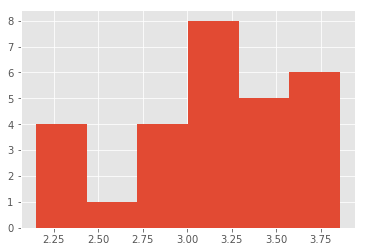

In [28]:
plt.hist(datos['gpa'],bins=6)

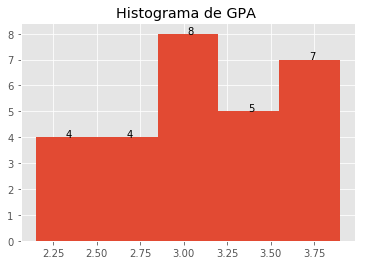

In [29]:
plt.hist(datos['gpa'],bins=cortesf)
plt.title('Histograma de GPA ')
xl=cortesf
yl=conteof
for a,b in zip(xl,yl):
    plt.text(a+.17,b,str(b)) 

El histograma tiene menor cantidad de datos en el lado izquierdo que en el lado derecho entonces es ASIMETRICO a la izquierda. La muestra no es buena para sacar conclsuiones

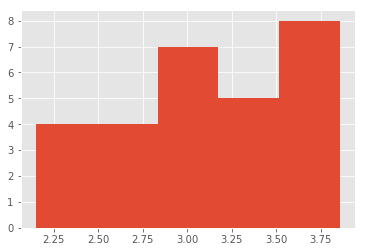

In [30]:
plt.style.use('ggplot')
with plt.style.context('ggplot'):
    # plot command goes here
    plt.hist(datos['gpa'],bins=5)
    plt.show()